In [1]:
import re
from nltk.corpus import stopwords
from string import punctuation
from material_cleaner.cleaner import text_cleaner
import pandas as pd
import numpy as np


In [2]:
data = pd.read_csv("last_5.csv")
data.head()

,Unnamed: 0,doi,pmid,text,link,label1
0,0,10.1377/hlthaff.2014.0743,25489031.0,Go to:AbstractThe ACA establishes “essential h...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4...,abstract
1,1,10.7508/ibj.2015.03.009,26025954.0,Go to:AbstractBackground:The variable numbers ...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4...,abstract
2,2,10.3748/wjg.v21.i8.2504,25741161.0,Go to:AbstractAIM: To evaluate the safety and ...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4...,abstract
3,3,10.4103/ijnmr.IJNMR_174_18,31333744.0,Go to:AbstractBackground:Cancer is the second ...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6...,abstract
4,4,10.1136/bmjpo-2017-000172,29637168.0,Go to:AbstractObjectiveTo describe the experie...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,abstract


In [3]:
def structure_1(text):
    text = text.lower()
    #substituting the known irregularities as from scraping
    text = text.replace("go to:abstract","")
    text = text.replace("go to:summary","")
    #removing last keywords as not needed using regex
    text = re.sub("\.keywords:.+","",text)
    return text.strip()

data.text = data.text.apply(lambda x : structure_1(x))

In [4]:
data.to_csv('last_5_final.csv')
data.head()

,Unnamed: 0,doi,pmid,text,link,label1
0,0,10.1377/hlthaff.2014.0743,25489031.0,the aca establishes “essential health benefits...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4...,abstract
1,1,10.7508/ibj.2015.03.009,26025954.0,background:the variable numbers of tandem-repe...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4...,abstract
2,2,10.3748/wjg.v21.i8.2504,25741161.0,aim: to evaluate the safety and efficacy of te...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4...,abstract
3,3,10.4103/ijnmr.IJNMR_174_18,31333744.0,background:cancer is the second most common ca...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6...,abstract
4,4,10.1136/bmjpo-2017-000172,29637168.0,objectiveto describe the experiences of austra...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,abstract


In [5]:
data['numerics'] = data.text.apply(lambda x: len([x for x in x.split() if x.isdigit()]))
data.head()

,Unnamed: 0,doi,pmid,text,link,label1,numerics
0,0,10.1377/hlthaff.2014.0743,25489031.0,the aca establishes “essential health benefits...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4...,abstract,2
1,1,10.7508/ibj.2015.03.009,26025954.0,background:the variable numbers of tandem-repe...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4...,abstract,3
2,2,10.3748/wjg.v21.i8.2504,25741161.0,aim: to evaluate the safety and efficacy of te...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4...,abstract,6
3,3,10.4103/ijnmr.IJNMR_174_18,31333744.0,background:cancer is the second most common ca...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6...,abstract,3
4,4,10.1136/bmjpo-2017-000172,29637168.0,objectiveto describe the experiences of austra...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,abstract,4


In [6]:
# data.numerics.tolist()

In [7]:
def r_stopwords(text):
    """only extracting alphabets, eliminating all punctuation and numbers"""
#     text = re.sub('\W+',' ',text)
    text = re.sub('[^a-zA-Z]+',' ',text)
#     text = te.sub('[0-9]')
    return text.strip()

#data.text = data.text.apply(lambda x : r_stopwords(x))
data.text = data.text.apply(lambda x : r_stopwords(x))
data.head()

,Unnamed: 0,doi,pmid,text,link,label1,numerics
0,0,10.1377/hlthaff.2014.0743,25489031.0,the aca establishes essential health benefits ...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4...,abstract,2
1,1,10.7508/ibj.2015.03.009,26025954.0,background the variable numbers of tandem repe...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4...,abstract,3
2,2,10.3748/wjg.v21.i8.2504,25741161.0,aim to evaluate the safety and efficacy of ten...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4...,abstract,6
3,3,10.4103/ijnmr.IJNMR_174_18,31333744.0,background cancer is the second most common ca...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6...,abstract,3
4,4,10.1136/bmjpo-2017-000172,29637168.0,objectiveto describe the experiences of austra...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,abstract,4


In [8]:
import nltk
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer() 

def clean(text):
    text = [lemmatizer.lemmatize(t) for t in text.split(' ')]
    text = text_cleaner.abs_clean(text, per_dict=False) 
    """abs_clean -> clean stopwords
                 -> clean distorted or irrelavent words using regex
                 -> clean verbs using spacy library
                 -> clean text with personnel dictionary if per_dict=True
                     #True - doesnt give good clusters, no elbow found in elbow method 
                     #False - good to go
                 -> final
                 #for further, see cleaner in material_Cleaner folder"""
    
    return text
data.text = data.text.apply(lambda x : clean(x))
data.head()

,Unnamed: 0,doi,pmid,text,link,label1,numerics
0,0,10.1377/hlthaff.2014.0743,25489031.0,service although however market neither class ...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4...,abstract,2
1,1,10.7508/ibj.2015.03.009,26025954.0,carrier significant pcr three phenylalanine va...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4...,abstract,3
2,2,10.3748/wjg.v21.i8.2504,25741161.0,lam growth abnormal time defect monotherapy ne...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4...,abstract,6
3,3,10.4103/ijnmr.IJNMR_174_18,31333744.0,resilience difference among time moreover comm...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6...,abstract,3
4,4,10.1136/bmjpo-2017-000172,29637168.0,training delay fellowship new region almost re...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,abstract,4


In [9]:
#list of documents 
documents = data.text.tolist()

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

def process_text(text):
    """tokenise text on space, othrwise tdidf will have its by-default tokeniser"""
    words = text.split(' ') 
    return words
    

vectorizer = TfidfVectorizer( tokenizer = process_text,stop_words='english', max_df=0.7) #
doc_vec = vectorizer.fit_transform(documents)

In [11]:
dtm = pd.DataFrame(doc_vec.toarray().transpose(), index = vectorizer.get_feature_names(), columns= data.doi.tolist())
arr = np.array(dtm)

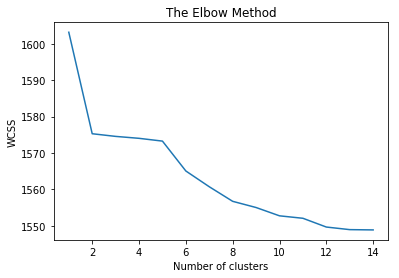

In [12]:
import matplotlib.pyplot as plt
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
%matplotlib inline
def plot_elbow_graph(km_init="k-means++"):
    """ helps in finding optimal no. of cluster"""
    wcss = []
    for i in range(1, 15):
        kmeans = KMeans(n_clusters = i, init = km_init, random_state = 42,max_iter = 100, n_init = 1) #random,k-means++
        kmeans.fit(arr)
        wcss.append(kmeans.inertia_)
    plt.plot(range(1, 15), wcss)
    plt.title('The Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()
    
plot_elbow_graph()

In [13]:
#n = 5, 6,10

In [14]:
import collections
import os
import time

def cluster(min=4,max=15,directory=str(time.time()).split('.')[0], km_init = "k-means++"):
    terms = vectorizer.get_feature_names()
    for n in range(min,max):
        model = KMeans(n_clusters=n, init=km_init, max_iter = 100, n_init=10)
        model.fit(doc_vec.transpose())

        clustering = collections.defaultdict(list)

        for idx, label in enumerate(model.labels_):
            clustering[label].append(terms[idx]) 
        if not os.path.isdir(directory):
            os.mkdir(directory)
        filename = "df_"+str(n)

        df = pd.DataFrame(columns = ('cluster_n','keywords','no.of words'))

        for key, value in clustering.items():
            cluster = key
            keyword =  ' '.join(value)
            length = len(value)

            df = df.append({'cluster_n':cluster,'keywords':str(keyword),'no.of words':length},ignore_index=True)
        df.to_excel(os.path.join(directory,filename+'.xlsx'))
    

In [ ]:
cluster(min=2,max=8, km_init="k-means++", directory = "kmeans_per_dictsdsa") # give directory == directoryname  , km_init = ['random' or 'k-means++']
"""It will save all cluster with in range given in min and max, to directory name given or bydefault timestamp directory"""

In [14]:
####keywords obtain after tfidf

In [15]:
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results

In [21]:
words=[]
feature_names = vectorizer.get_feature_names()
for doc in documents:
    tfidf_vector = vectorizer.transform([doc])
    sorted_items = sort_coo(tfidf_vector.tocoo())
    keywords = extract_topn_from_vector(feature_names=feature_names, sorted_items= sorted_items, topn = 10000)
    keyw = [key for key in keywords.keys()]
    words.append(keyw)
    

In [24]:
data['tfidf'] = [' '.join(x) for x in words]

In [25]:
data.to_csv('keywords_tfidf.csv')